## Linear Regression
El objetivo de una linea de regresión es, dado una serie de puntos, ofrecer la línea que tiene la cualidad de ser la que esta más cerca de todos ellos.

1. [Base teórica](#base)
2. [Visualización de Objetivo](#goal)


<div id="base" class="section level1" />
# Base Teórica

## Puntos
El problema nos ofrece unos datos en forma de lista/array de puntos con el formato (x,y). Usando estos datos de entreamiento buscamos la linea de regresión.

$[(1,2), (2,5), (6,7)]$

## ¿Qué buscamos?
Los valores de $\theta$ para la función de una recta

$ h_\theta(x) = \theta_0 + \theta_1 x $

## Cost Function
Función que calcula el error/diferencia entre cada punto y una recta dada

$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $

## Objetivo
El objetivo es encontrar los valores de $\theta$ que hace J mínimo

$ minimize_{\theta_0, \theta_1} J(\theta_0, \theta_1) $

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, errno

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# Funciones usadas durante el notebook
def drawLineByFunction(plot, theta0=0, theta1=0, color='r'): # l(x) = theta0 + theta1X 
  # plot axis return [x_left, x_right, y_bottom, y_top]
  x = [plot.axis()[0], plot.axis()[1]]
  y = [theta0 + theta1*plot.axis()[0], theta0 + theta1*plot.axis()[1]]
  plot.plot(x,y,'k-', color=color)
    
def drawLineByPoints(plot, p1=[0,0], p2=[1,1], color='g'):
  x = [p1[0], p2[0]]
  y = [p1[1], p2[1]]
  plot.plot(x,y,'k-', color=color)

# Some gradient descent settings
iterations = 100;
alpha = 0.1;

# J
def computeCost(X, y, theta): 
  m = len(y)
  predictions = X*theta
  sqrErrors = np.square(predictions - y);
  J = 1/(2*m) * sum(sqrErrors)
  #return J
  return np.asarray(J).reshape(-1)[0]

# GD algorithm
def gradientDescent(X, y, theta, alpha, num_iters):
  m = len(y)
  J_history = [0 for x in range(num_iters)]
  B = [1 for x in range(len(X))]
  X = np.column_stack((B, X)) 
  #print(X)
  for iter in range(0, num_iters):
    predictions = X*theta
    error = predictions - y
    delta = (1/m) * X.transpose() * error
    theta = theta - (alpha * delta)
    J_history[iter] = computeCost(X, y, theta)
    #if(iter > 3 and J_history[iter] > J_history[iter - 1]):
    #    return theta, J_history
  return theta, J_history


  
def plotPanda(data, ax=None,ylim=[0, 10], xlim=[-5, 5], alpha=1, text=["", "", "", ""], theta=None, lines=[]):
  textX = xlim[1] + 1
  rangeY = ylim[1] - ylim[0];
  stepY = rangeY / 5
  textLine1Y = ylim[1] - 1
  textLine2Y = textLine1Y - stepY
  textLine3Y = textLine2Y - stepY
  textLine4Y = textLine3Y - stepY
  #print(str(textX) + ', ' + str(textLine1Y) + ', ' + text[0])
  #print(str(textX) + ', ' + str(textLine2Y) + ', ' + text[1])
  if(ax is not None):
    ax.clear()
  ax = data.plot(kind='scatter', x='x', y='y',ylim=ylim, xlim=xlim, figsize=(8, 6), alpha=alpha, ax=ax, grid=True)
  ax.figure.patch.set_facecolor('xkcd:white')
  ax.text(textX, textLine1Y, text[0], fontsize=15)
  ax.text(textX, textLine2Y, text[1], fontsize=15)
  ax.text(textX, textLine3Y, text[2], fontsize=15)
  ax.text(textX, textLine4Y, text[3], fontsize=15)
  if(theta is not None):
    #print(theta)
    drawLineByFunction(ax, theta0=theta[0], theta1=theta[1])
  for line in lines:
    #print("---")
    drawLineByPoints(ax, p1=line[0], p2=line[1])
  return ax

# https://github.com/alexanderkuk/log-progress
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )
        
def calculateMeanAndPlot(data, ax, title):
  lastpoint = 'Last Point: (' + str(round(data.values[-1][0],2)) + ', ' + str(round(data.values[-1][1], 2)) + ')'
  # Añadimos puntos
  m = len(data)
  m_string = str(m).zfill(3)
    
  ax = plotPanda(data.iloc[:m], ax=ax, text=[title, lastpoint, "", ""])
  ax.get_figure().savefig('./linear_regression_0/LinearRegression_' + m_string + '_001.jpg', bbox_inches="tight")
    
  # Media
  sumOfY = 0
  for j in range(m):
    sumOfY+= data.values[j][1]
  
  mean = sumOfY/m
  theta0 = mean
  theta1 = 0
  # Error
  sumOfError = 0;
  lines = [ [[0,0], [0,0]] for x in range(m)]
  for j in range(m):
    sumOfError+= abs(data.values[j][1] - mean) 
    #drawLineByPoints(ax, p1=data.values[j], p2=[data.values[j][0], theta0 + theta1*data.values[j][0]])
    lines[j] = [data.values[j], [data.values[j][0],mean]] 
  lineFunction = r'Line Function: $h_\theta(x) = ' + str(round(mean,2)) + '$ (red)'
  lineError = r'Error: ' + str(round(sumOfError,2)) + ' (green)'
  ax = plotPanda(data.iloc[:m], ax=ax, text=[title, lastpoint, lineFunction, lineError], theta=[theta0,theta1], lines=lines)
  ax.get_figure().savefig('./linear_regression_0/LinearRegression_' + m_string + '_002.jpg', bbox_inches="tight")

def calculateThetaAndPlot(data, ax, title, theta):
  lastpoint = 'Last Point: (' + str(round(data.values[-1][0],2)) + ', ' + str(round(data.values[-1][1], 2)) + ')'
  #print('Step: ' + str(i).zfill(2) + " /" + point)
  # Añadimos punto
  m = len(data)
  m_string = str(m).zfill(3)
  # De la estructura Panda, pasamos a matrices
  X = np.asmatrix(data.head(m).as_matrix(['x']))
  y = np.asmatrix(data.head(m).as_matrix(['y']))
    
    
  ax = plotPanda(data.iloc[:m], ax=ax, text=[title, lastpoint, "", ""])
  ax.get_figure().savefig('./linear_regression_1/LinearRegression_' + m_string + '_001.jpg', bbox_inches="tight")
    
  # Aplicamos GD
  theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
  theta0 = theta.A1[0]
  theta1 = theta.A1[1]
    
  # Error
  sumOfError = 0;
  lines = [ [[0,0], [0,0]] for x in range(m)]
  for j in range(m):
    sumOfError+= abs(data.values[j][1] - (theta[0] + theta[1]*data.values[j][0])) 
    #drawLineByPoints(ax, p1=data.values[j], p2=[data.values[j][0], theta0 + theta1*data.values[j][0]])
    lines[j] = [data.values[j], [data.values[j][0], theta0 + theta1*data.values[j][0]]]
  sumOfError = sumOfError.A1[0]
  #print(sumOfError)
  lineFunction = r'$h_\theta(x) = ' + str(round(theta0,2)) + ' + ' + str(round(theta1,2)) +'x$ (red)'
  lineError = 'Error: ' + str(round(sumOfError,2)) + ' (green)'
  ax = plotPanda(data.iloc[:m], ax=ax, text=[title, lastpoint, lineFunction, lineError], theta=[theta0,theta1], lines=lines)
  ax.get_figure().savefig('./linear_regression_1/LinearRegression_' + m_string + '_002.jpg', bbox_inches="tight")
    
def animationOfLinearRegressionZeroVar(data, gif=False):
  title = "Linear Regression with 0 Variables"
  subtitle = r'(mean y)'
  lineFunction =  r'$h_\theta = \theta_0$' 
  # Creamos una carpeta si no existe para guardar las imágenes
  os.makedirs('linear_regression_0', exist_ok=True)
  # Dibujamos una gráfica con texto como portada
  ax = plotPanda(data, alpha=0, text=[title, subtitle, lineFunction, ""])
  ax.get_figure().savefig('./linear_regression_0/LinearRegression_000.jpg', bbox_inches="tight")
  
  if(gif is False):
    calculateMeanAndPlot(data, ax, title)
    return
  for i in log_progress(range(len(data)), name="Generando imágenes por pasos", size=len(data)):
    calculateMeanAndPlot(data[:(i+1)], ax, title)

def animationOfLinearRegressionOneVar(data, iterations=3000, alpha=0.1, gif=False):
  title = "Linear Regression with 1 Variables"
  subtitle = r'using Gradient Descent'
  lineFunction = r'$h_\theta = \theta_0 + \theta_1x$'
  theta = np.matrix([[0],[0]])
  os.makedirs('linear_regression_1', exist_ok=True)  
  ax = plotPanda(data, alpha=0, text=[title, subtitle, lineFunction, ""])
  ax.get_figure().savefig('./linear_regression_1/LinearRegression_000.jpg', bbox_inches="tight")
  
  if(gif is False):
    calculateThetaAndPlot(data, ax, title, theta)
    return
  for i in log_progress(range(len(data)), name="Generando imágenes por pasos", size=len(data)):
    calculateThetaAndPlot(data[:(i+1)], ax, title, theta)

<div id="goal" class="section level1" />
# Visualización de Objetivo

Aquí podemos ver como generamos 50 datos(puntos x,y) de forma aleatoria, mediante el algoritmo de Gradient Descent(GD a partir de ahora) calculamos $\theta$ para tener los valores necesarios para la recta.

Si todo ha ido bien el coste de la primera iteración debería ser mayor que el de la última.

In [3]:
# Generamos 50 datos (x,y) con una distribucion Normal
a = np.random.randn(50, 2)
df = pd.DataFrame(a, columns=list('xy'))
# A la columna y le restamos la columna x así nos aparece una nube de puntos descendentes
df['y'] = df['y'] - df['x'] + 4

X = np.asmatrix(df.as_matrix(['x']))
y = np.asmatrix(df.as_matrix(['y']))
# Si quieres ver los datos descomenta
# print(X) 
# print(y)

# Comprobamos si funciona bien
theta = np.matrix([[0],[0]])
iterations = 300
alpha = 0.1;
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print("Valores de J (Coste)")
print("Primera iteración: " + str(J_history[0]) + " - Ultima iteración: " + str(J_history[len(J_history) -1]))
print("-------------")
print(r'θ = ' + str(theta.tolist()))

Valores de J (Coste)
Primera iteración: 7.796773453661537 - Ultima iteración: 0.5302722098332591
-------------
θ = [[3.833635928870836], [-1.1464802428281742]]


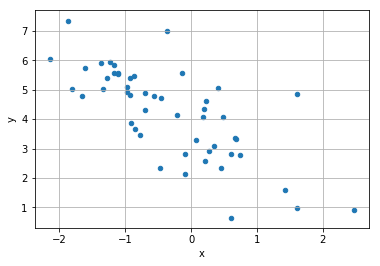

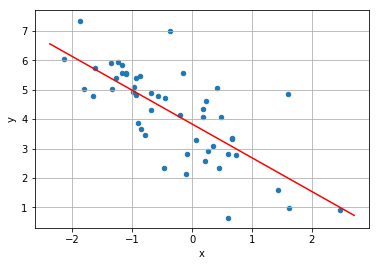

In [4]:
# Pintamos la gráfica con los puntos y aleatorios(azul) y la línea de regresión obtenida (rojo)
# Puntos
ax = df.plot(kind='scatter', x='x', y='y', grid=True)

ax = df.plot(kind='scatter', x='x', y='y', grid=True)
# Añadimos la linea con los valores de theta
drawLineByFunction(ax, theta0=theta.A1[0], theta1=theta.A1[1])

## Facilitar eliminando primero  $\theta_1$

Así que la función es constante
$ h_\theta(x) = \theta_0 $ 

La función de coste queda

$ J(\theta_0) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $

$ J(\theta_0) = \frac{1}{2m} \sum_{i=1}^{m} (\theta_0 - y^{(i)})^2 $



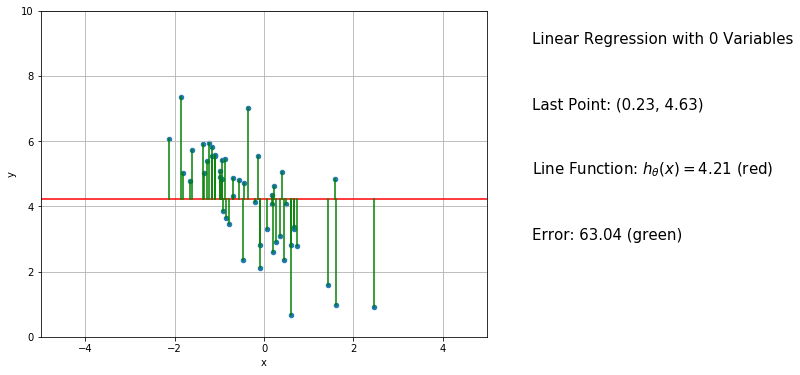

In [5]:
# Genera en una carpeta imágenes para visualizar el proceso - util para hacer gifs
animationOfLinearRegressionZeroVar(df, gif=False)


## Concretamos visualmente el error de la linea de regresión  $\theta_1$

$ h_\theta(x) = \theta_0 + \theta_1 x$ 



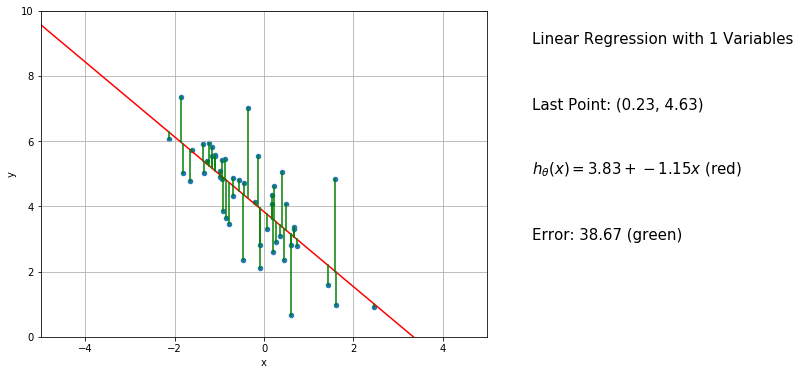

In [6]:
# Genera en una carpeta imágenes para visualizar el proceso - util para hacer gifs
animationOfLinearRegressionOneVar(df, gif=False)

# Referencias

Este es mi primer notebook  y mi primer acercamiento a Python, así que he tenido que buscar bastante documentación, os dejo aquí los enlaces que he ido visitando a medida que construia este notebook.

http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/

http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html

http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html

https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

https://stackoverflow.com/questions/17091769/python-pandas-fill-a-dataframe-row-by-row

https://github.com/jermwatt/mlrefined/blob/gh-pages/presentations/8_Linear_regression/8_4_feature_scaling_SLIDES.ipynb

https://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/

http://jakevdp.github.io/blog/2013/05/19/a-javascript-viewer-for-matplotlib-animations/

https://eliezersilva.blog/2015/12/26/embedding-gif-animations-in-ipython-notebook/

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

https://matplotlib.org/gallery/api/mathtext_asarray.html#sphx-glr-gallery-api-mathtext-asarray-py

http://effbot.org/zone/default-values.htm

https://plot.ly/python/matrix-operations/

https://gist.github.com/clayton/6196167 (To use video animations)

http://tiao.io/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

https://matplotlib.org/users/text_intro.html

https://towardsdatascience.com/a-very-simple-demo-of-interactive-controls-on-jupyter-notebook-4429cf46aabd

http://www.bigendiandata.com/2017-04-18-Jupyter_Customer360/

https://stackoverflow.com/questions/13567345/how-to-calculate-the-sum-of-all-columns-of-a-2d-numpy-array-efficiently

https://docs.python.org/3/library/os.html?highlight=makedirs#os.makedirs

https://github.com/alexanderkuk/log-progress